In [3]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

np.seterr(all='raise')
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
#requirements: Pandas, Seaborn, Matplotlib
#this notebook loads the results for single cell tuning and analysis and plots them, creates figure 1 and related supplemental figures
#todo supp figure 2, counts for supp 1a, supp 1d. 
#mark a few figs for illustrator
#counts in legend


In [4]:
#load a pandas dictionary with organized and processed single cell tuning dictionary
all_data = pd.read_pickle('./ALL_DATA_SINGLE_CELL.pkl')

In [5]:
#figure 1c, d, e, g, supp 1 h, i
#print tables of tuned cell counts in all regions and stim conditions

regions = ['VISl', 'VISp', 'VISpm', 'VISal', 'VISrl', 'VISam']
lines = ['Cux2-CreERT2', 'Rbp4-Cre_KL100', 'Rorb-IRES2-Cre'] 

tuned_df = pd.DataFrame(columns = ['cell_id', 'tuning_type', 'region', 'line', 'run_rho', 'stim'])

perc_cells_tuned = []
average_corr_coef = []

data = all_data[all_data.condition == 'running_analysis']

for region in regions:
    for line in lines:
        for stim in ["stimulus", "spontaneous", "natural", "synthetic"]:
        
            temp_data = data[data.region == region]
            temp_data = temp_data[temp_data['cre-line'] == line]
            temp_data = temp_data[temp_data['stimulus'] == stim]

            num_cells = len(temp_data)

            temp_data = temp_data[temp_data.pvalue < 0.05]

            num_tuned = len(temp_data)

            num_dec, num_inc = 0, 0

            run_rho_list = []
            for i, row in temp_data.iterrows():

                if (row['run_rho'] < 0) and (row['run_rho_p'] < 0.05):
                    tuning_type = 1
                    num_dec += 1
                elif (row['run_rho'] > 0) and (row['run_rho_p'] < 0.05):
                    tuning_type = 2
                    num_inc += 1
                else:
                    tuning_type = 3

                if row['run_rho_p'] <0.05:
                    run_rho_list.append(row['run_rho'])

                temp = {'region': [region], 'line': [line], 'cell_id': row['cell_id'], 'tuning_type': [tuning_type], 'run_rho': [row['run_rho']], 'stim': [stim]}

                d1 = pd.DataFrame.from_dict(temp)

                tuned_df = pd.concat((tuned_df, d1))

            print (region, line, stim, num_cells, num_tuned, num_dec, num_inc, num_tuned / float(num_cells))
            if stim == 'stimulus':
                perc_cells_tuned.append(num_tuned / float(num_cells))
                average_corr_coef.append(np.mean(run_rho_list))
        

C:\Users\Amy\anaconda3\envs\allensdk\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



VISl Cux2-CreERT2 stimulus 2682 1697 519 752 0.6327367636092468
VISl Cux2-CreERT2 spontaneous 2131 892 380 308 0.41858282496480526
VISl Cux2-CreERT2 natural 2708 1543 472 684 0.5697932053175776
VISl Cux2-CreERT2 synthetic 2622 1559 538 624 0.5945842868039665
VISl Rbp4-Cre_KL100 stimulus 111 105 38 40 0.9459459459459459
VISl Rbp4-Cre_KL100 spontaneous 82 63 8 27 0.7682926829268293
VISl Rbp4-Cre_KL100 natural 111 68 22 21 0.6126126126126126
VISl Rbp4-Cre_KL100 synthetic 136 116 41 34 0.8529411764705882
VISl Rorb-IRES2-Cre stimulus 683 355 27 246 0.5197657393850659
VISl Rorb-IRES2-Cre spontaneous 573 224 26 137 0.39092495636998253
VISl Rorb-IRES2-Cre natural 656 212 27 108 0.3231707317073171
VISl Rorb-IRES2-Cre synthetic 540 335 41 208 0.6203703703703703
VISp Cux2-CreERT2 stimulus 1004 306 90 151 0.3047808764940239
VISp Cux2-CreERT2 spontaneous 841 301 140 101 0.3579072532699168
VISp Cux2-CreERT2 natural 802 326 103 143 0.40648379052369077
VISp Cux2-CreERT2 synthetic 1004 306 95 150 0.304

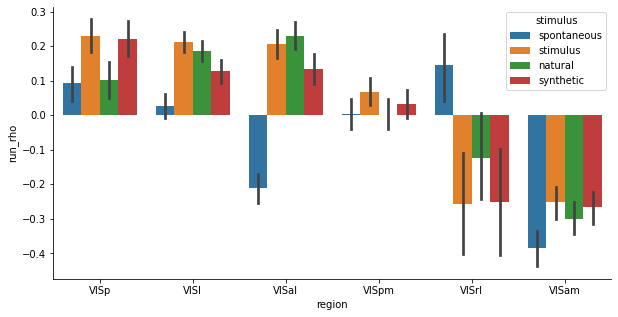

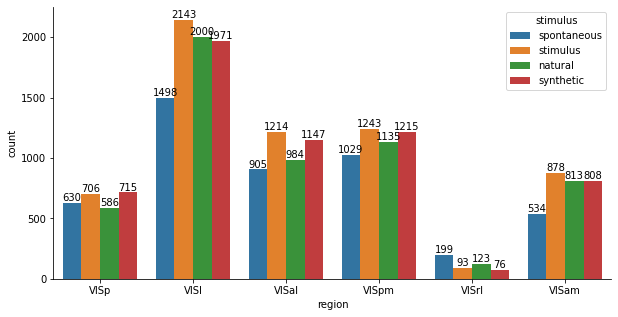

In [6]:
#figure1 f,g, supplemental f,g
plt.figure(figsize = [10, 5])
sns.barplot(x = "region", y = "run_rho", hue = "stimulus",
               data = all_data[(all_data.condition == 'running_analysis') & (all_data.run_rho_p < 0.05)], order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])

sns.despine()

plt.figure(figsize = [10, 5] )
ax = sns.countplot(x = "region", hue = "stimulus",
               data = all_data[(all_data.condition == 'running_analysis') & (all_data.run_rho_p < 0.05)], order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])


for container in ax.containers:
    ax.bar_label(container)
    
    
sns.despine()


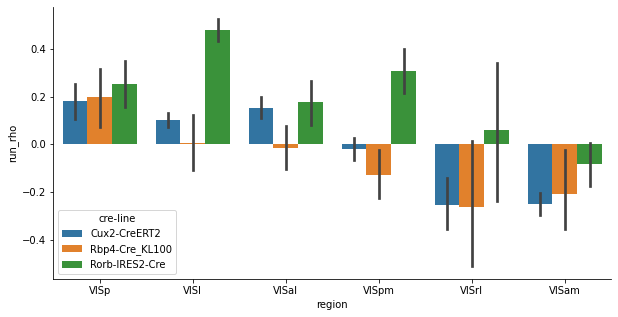

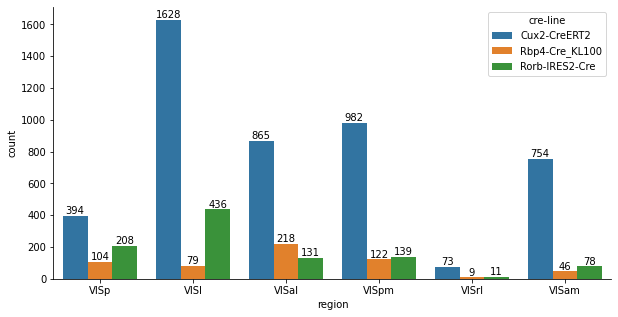

In [7]:
plt.figure(figsize = [10, 5] )
sns.barplot(x = "region", y = "run_rho", hue = "cre-line", 
            data = all_data[(all_data.condition == 'running_analysis') & (all_data.pvalue < 0.05)& (all_data.stimulus == 'stimulus')], 
            order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])

sns.despine()

plt.figure(figsize = [10, 5] )
ax = sns.countplot(x = "region", hue = "cre-line",
               data = all_data[(all_data.condition == 'running_analysis') & (all_data.run_rho_p < 0.05) & 
                               (all_data.stimulus == 'stimulus')], order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])


for container in ax.containers:
    ax.bar_label(container)
    
    
sns.despine(left=True, bottom=True)



sns.despine()


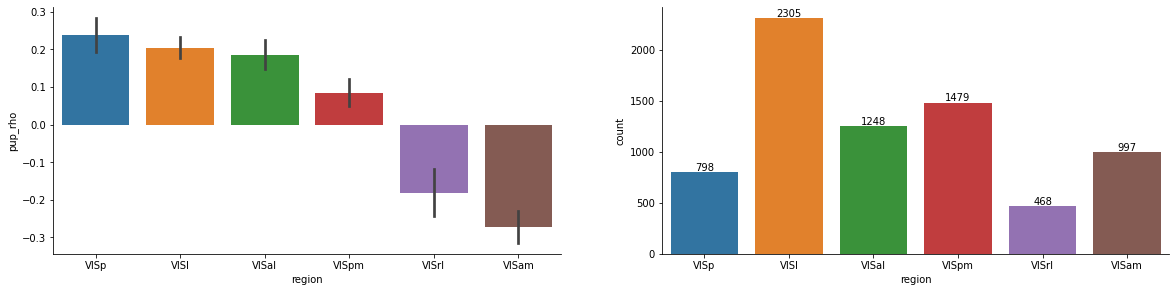

In [8]:
plt.figure(figsize = [20, 10])

ax = plt.subplot(221)

sns.barplot(x = "region", y = "pup_rho", ax = ax,
               data = all_data[(all_data.condition == 'pupil_analysis') & (all_data.pup_rho_p < 0.05)], 
            order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])


sns.despine()

ax = plt.subplot(222)

ax = sns.countplot(x = "region", ax = ax,
               data = all_data[(all_data.condition == 'pupil_analysis') & (all_data.pup_rho_p < 0.05)],
            order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])


for container in ax.containers:
    ax.bar_label(container)
    
    



sns.despine()


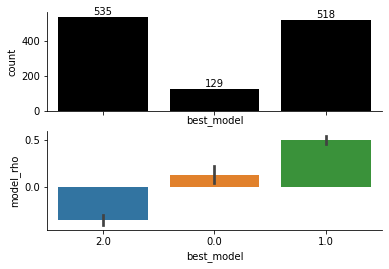

In [9]:
#supplemental 1a


f, (ax, ax2) = plt.subplots(2, 1, sharex=True, )


ax = sns.countplot(x = "best_model", color = 'k', saturation = 0, ax = ax,
                   data = all_data[(all_data.condition == 'model_analysis') & 
                                                     (all_data.mod_rho_p < 0.05)], order = [2.0, 0.0, 1.0])

ax2 = sns.barplot(x = "best_model", y = "model_rho",  ax = ax2,
            data = all_data[(all_data.condition == 'model_analysis') & 
                                                                (all_data.mod_rho_p < 0.05)], order = [2.0, 0.0, 1.0])


for container in ax.containers:
    ax.bar_label(container)
    


sns.despine()
plt.savefig("models_supp.pdf", dpi = 300)

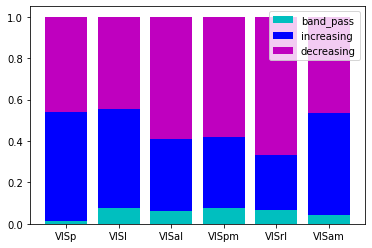

<BarContainer object of 6 artists>

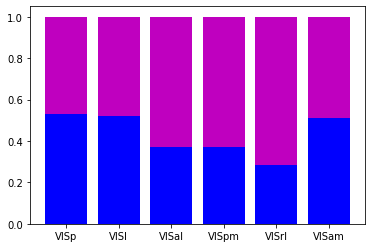

In [10]:
#Supplemental 1b, c 

frac_band = []
frac_inc = []
frac_dec = []


count_data = all_data[(all_data.condition == 'model_analysis') ]

count_data = count_data.groupby(["region", "best_model"]).size().to_frame("count").reset_index()

regions = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"]

for i, region in enumerate(regions):
    temp_frame = count_data[count_data.region == region]
    
    a = int(temp_frame[temp_frame.best_model == 0.0]["count"]) 
    b = int(temp_frame[temp_frame.best_model == 1.0]["count"])
  
    c = int(temp_frame[temp_frame.best_model == 2.0]["count"])
    
    total = float(a + b + c)
    
    frac_band.append(a /total)
    frac_inc.append(b /total)
    frac_dec.append(c /total)

    
frac_band = np.array(frac_band)
frac_inc = np.array(frac_inc)
frac_dec = np.array(frac_dec)

plt.bar(range(len(regions)), frac_band, color = 'c', tick_label = regions, label = "band_pass")
plt.bar(range(len(regions)), frac_inc, bottom = frac_band, color = 'b', label = "increasing")
plt.bar(range(len(regions)), frac_dec, bottom = frac_band + frac_inc, color = 'm', label = "decreasing")

plt.legend()  

#plt.savefig("./figs/revision_figs/model_frac_sig_tuned.eps", format = "eps", dpi = 300)
plt.show()


total = (frac_inc + frac_dec).astype("float")

plt.bar(range(len(regions)), frac_inc / total, color = 'b', tick_label = regions)
plt.bar(range(len(regions)), frac_dec / total, bottom = frac_inc / total, color = 'm')
    
#plt.savefig("./figs/revision_figs/model_ratio_sig_tuned.eps", format = "eps", dpi = 300)

<Figure size 1440x720 with 0 Axes>

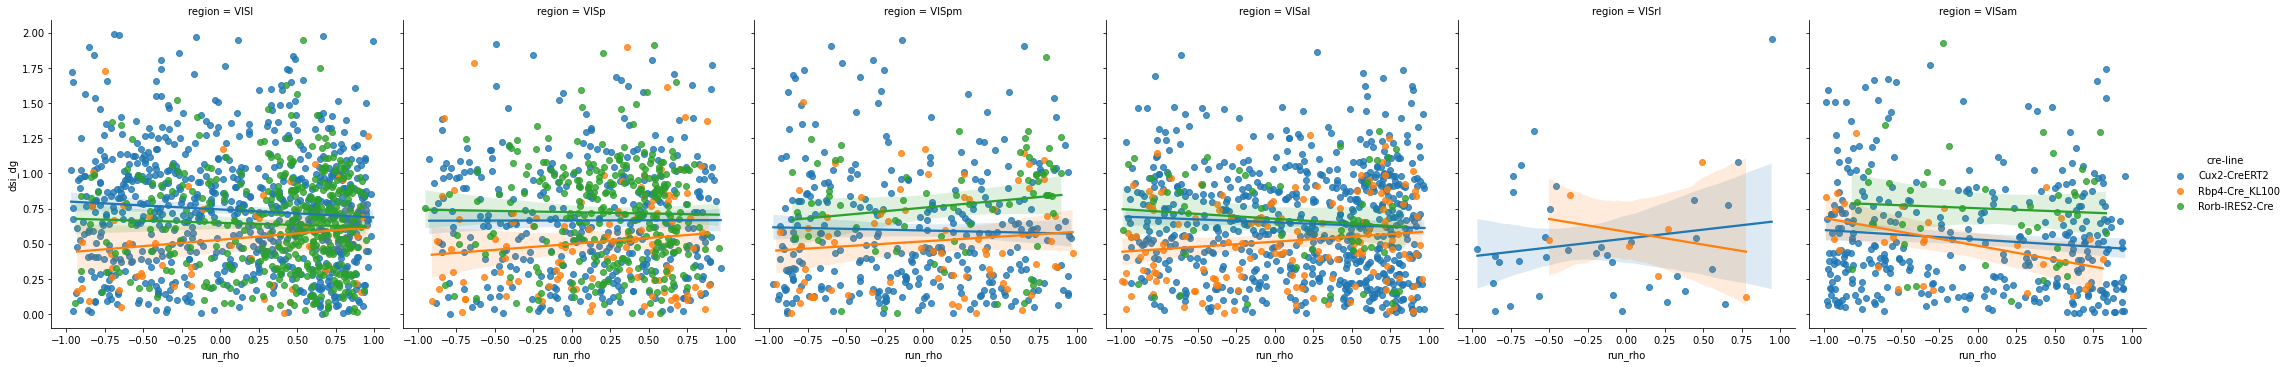

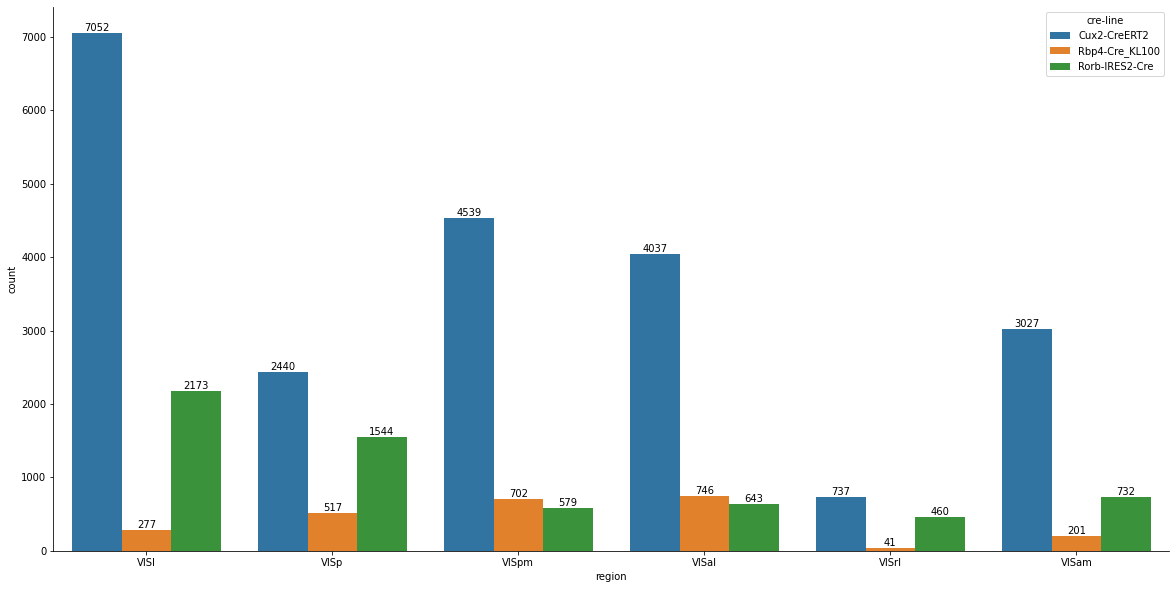

In [11]:
plt.figure(figsize = [20, 10])
sns.lmplot(data = all_data[all_data.stimulus == 'stimulus'], x = 'run_rho', y = 'dsi_dg', hue = 'cre-line', col = 'region')

plt.figure(figsize = [20, 10])
ax = sns.countplot(data = all_data[all_data.stimulus == 'stimulus'], x = 'region', hue = 'cre-line')


for container in ax.containers:
    ax.bar_label(container)
    


sns.despine()

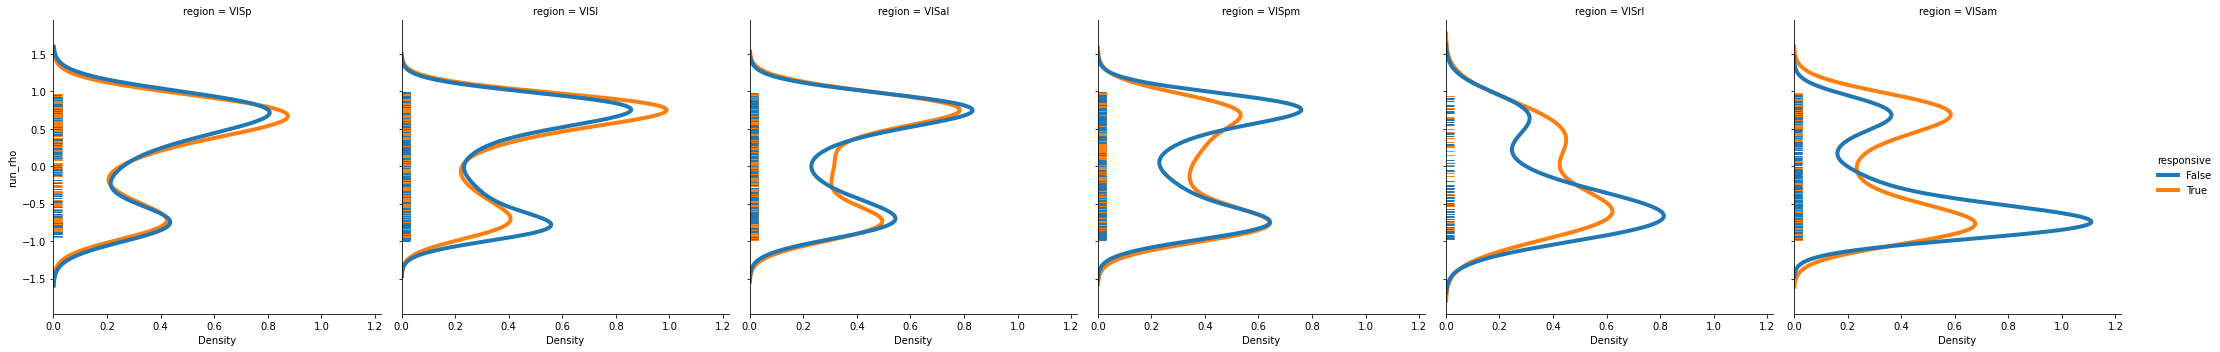

In [12]:
sns.displot(data = all_data[ (all_data.stimulus == 'stimulus') & (all_data.pvalue < 0.05)], kind = 'kde', rug = True, common_norm = False,
            y = 'run_rho', hue = 'responsive', col = 'region', linewidth = 4,
        col_order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"] )



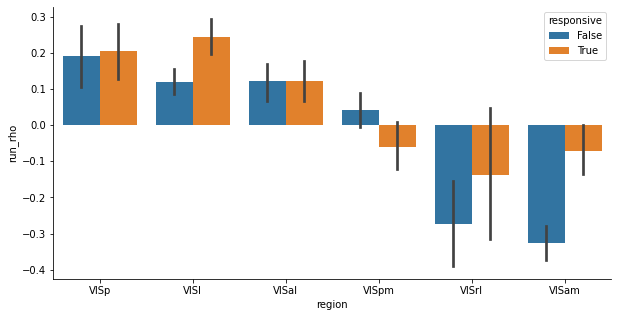

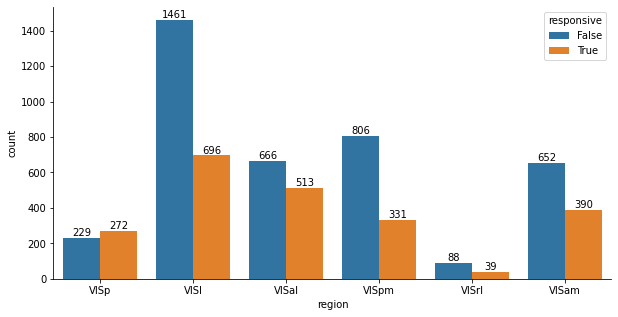

In [13]:
#correlation coefficient for tuned neurons

plt.figure(figsize = [10, 5])
sns.barplot(x = "region", y = "run_rho", data = all_data[(all_data.stimulus == 'stimulus') & (all_data.pvalue < 0.05) ],
            hue = 'responsive', order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])

sns.despine()
plt.figure(figsize = [10, 5])

ax = sns.countplot(x = "region",  data = all_data[(all_data.stimulus == 'stimulus') & (all_data.pvalue < 0.05) ],
            hue = 'responsive', order = ["VISp", "VISl", "VISal", "VISpm", "VISrl", "VISam"])

for container in ax.containers:
    ax.bar_label(container)
sns.despine()


-0.6235847240103245 0.005687915864499923 number of regions/cre-lines  18


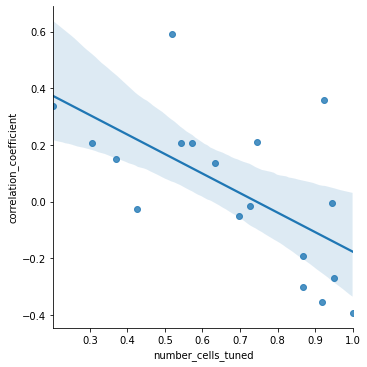

In [14]:
#only needed to compute regression p-value
from scipy.stats import linregress


_,_, r, p, _ = linregress(perc_cells_tuned, average_corr_coef)



tuned_cor = {'number_cells_tuned': perc_cells_tuned, 'correlation_coefficient': average_corr_coef}
tuned_df = pd.DataFrame.from_dict(tuned_cor)


sns.lmplot(x = 'number_cells_tuned', y = 'correlation_coefficient', data = tuned_df)
print(r, p, "number of regions/cre-lines ", len(perc_cells_tuned) )

#plt.savefig("./figs/revision_figs/corr_perc_tuned_average_corr_coef.eps", format = "eps", dpi = 300)

In [15]:
POP_TUNING = pd.read_pickle('POP_TUNING.pkl')

In [17]:
dfgb = POP_TUNING.groupby(['specimen'])['apref_diff', 'pref_diff'].mean()

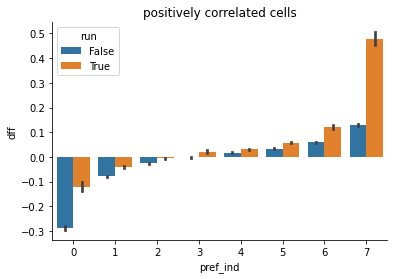

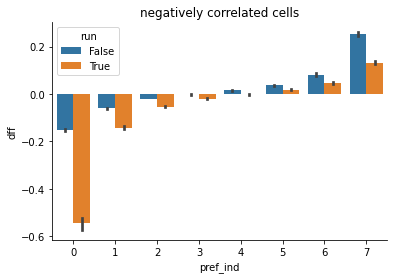

In [20]:
sns.barplot(data = POP_TUNING[POP_TUNING.corr_val == True], x = "pref_ind", y = "dff",  hue = "run")
plt.title("positively correlated cells")
sns.despine()
plt.savefig("fig3A_pos.pdf", dpi = 300)
plt.show()




sns.barplot(data = POP_TUNING[POP_TUNING.corr_val == False], x = "pref_ind", y = "dff",  hue = "run")
plt.title("negatively correlated cells")
sns.despine()
plt.savefig("fig3A_neg.pdf", dpi = 300)
plt.show()


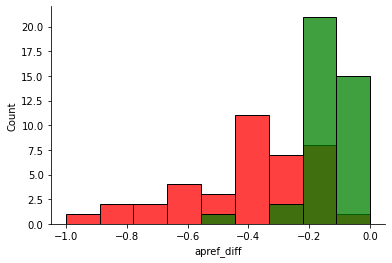

In [21]:
sns.histplot(data = dfgb, x = 'apref_diff',bins =  np.linspace(-1, 0, 10), color = 'r')
sns.histplot(data = dfgb, x = 'pref_diff', bins = np.linspace(-1, 0, 10),  color = 'g')
sns.despine()
plt.savefig("fig3Branksums5e-37.pdf", dpi = 300)

In [35]:
len(np.unique(POP_TUNING[POP_TUNING.corr_val == False]["cell_id"])), len(np.unique(POP_TUNING[POP_TUNING.corr_val == True]["cell_id"])), 

(3209, 2577)

In [22]:
len(dfgb)

39

In [64]:
#the below cell uses code from https://github.com/achristensen56/allenrunning to
#download subset of the data from the brain observatory and analyze it
#(e.g. to create the data which is plotted above) 
#runnign this code has many more requirements than plotting the figures above 
#and is generally not backwards or forwards compatible with the allensdk 

#also fyi this takes forever to run.

from code_for_submission.utils import *
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache


#this function downloads data for a list of regions and cre-lines and stimuli but we'll try to pick the smallest data
#set for processing speed
data_set = download_data(['VISrl'], ['Rbp4-Cre_KL100'], stimulus= [stim_info.DRIFTING_GRATINGS], tracking = True)

arranged_data, _ = arrange_data_rs_new(data_set)

drifting_gratings
natural_movie_one
natural_movie_three
spontaneous
drifting_gratings
natural_movie_one
natural_movie_three
spontaneous
drifting_gratings
natural_movie_one
natural_movie_three
spontaneous


In [65]:
neural_responses = combine_rs_data(arranged_data, data_set)

In [66]:
stim_results = make_tuning_curves3(neural_responses, data_set)

spontaneous


C:\Users\Amy\Documents\AllenRunningSpeed\code_for_submission\utils.py:282: RuntimeWarning: Mean of empty slice
  if np.isfinite(np.nanmean(y[shuf_inds == i])):


stimulus


In [67]:
all_data = rs_models_stats(stim_results, 'stimulus', 'VISrl', 'Rbp4-Cre_KL100')    

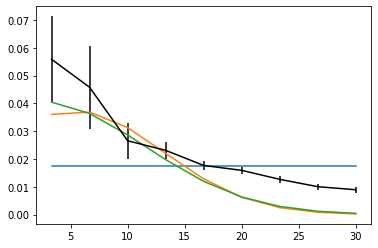

In [69]:
results = stim_results['stimulus'] 

cell_ids = [k for k in results.keys()]
cell_id = np.random.choice(cell_ids)
train_list, test_list, x, y, std_y, rho, p, pvalue = results[cell_id]


band_res, inc_res, dec_res = gaus_model_comparison(train_list[1], test_list[1], verbose = False)

plt.errorbar(x, y, std_y, c = 'k')
plt.plot(x, inc_res.best_fit)
plt.plot(x, band_res.best_fit)
plt.plot(x, dec_res.best_fit)
plt.savefig("./final_submission/figs/model_example_dec2.eps", dpi = 300, format = 'eps')